# Klasifikasi K-Nearest Neighbour (KNN)
### Dengan K = 10
Sumber : https://github.com/kk7nc/Text_Classification#id34 (Dengan Perubahan)

## Import module / package

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"data/tweets_labelled_tokenized.csv")
dataset.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['berdiri', 'di', 'atas', 'kaki', 'sendiri', '...",-2,Negatif
2,"['penyebab', 'harga', 'telur', 'anjlok', 'vers...",-1,Negatif
3,"['turunnya', 'permintaan', 'masyarakat', 'telu...",-1,Negatif
4,"['peternak', 'ayam', 'petelur', 'mengaku', 'me...",1,Positif


## Split Data (Test & Train)

In [3]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(dataset['tweet'], dataset['sentimen'], test_size = 0.3, random_state = 42)

In [4]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X
data_train['sentimen'] = train_Y

data_test = pd.DataFrame()
data_test['tweet'] = test_X
data_test['sentimen'] = test_Y

## Klasifikasi Data dengan KNN (K = 10) dan Menampilkan Akurasi

In [5]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier(n_neighbors=10)),
                     ])

text_clf.fit(train_X, train_Y)
predicted = text_clf.predict(test_X)

print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y, predicted)*100, "%")
print("K-Nearest Neighbors Precision:", precision_score(test_Y, predicted, average="binary", pos_label="Positif")*100, "%")
print("K-Nearest Neighbors Recall:", recall_score(test_Y, predicted, average="binary", pos_label="Positif")*100, "%")
print("K-Nearest Neighbors f1_score:", f1_score(test_Y, predicted, average="binary", pos_label="Positif")*100, "%")

print(f'Confusion Matrix:\n {confusion_matrix(test_Y, predicted)}')
print('====================================================\n')
print(classification_report(test_Y, predicted, zero_division=0))

K-Nearest Neighbors Accuracy: 82.06018518518519 %
K-Nearest Neighbors Precision: 86.25730994152046 %
K-Nearest Neighbors Recall: 90.62980030721967 %
K-Nearest Neighbors f1_score: 88.38951310861424 %
Confusion Matrix:
 [[119  94]
 [ 61 590]]

              precision    recall  f1-score   support

     Negatif       0.66      0.56      0.61       213
     Positif       0.86      0.91      0.88       651

    accuracy                           0.82       864
   macro avg       0.76      0.73      0.74       864
weighted avg       0.81      0.82      0.82       864



K-Nearest Neighbors Accuracy: 82.06018518518519 %


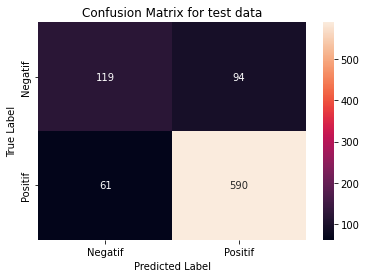

In [6]:
print("K-Nearest Neighbors Accuracy:", accuracy_score(test_Y, predicted)*100, "%")

conf_mat = confusion_matrix(test_Y, predicted)
class_label = ["Negatif","Positif"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()